In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('new_data.csv')

df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['CRP [mg/l]'] = pd.to_numeric(df['CRP [mg/l]'], errors='coerce')
df['Sonographies No'] = df['Sonographies No'].fillna(0)
df['RTG No'] = df['RTG No'].fillna(0)
df.loc[~df['COVID'].isin(['positive', 'negative']), 'COVID'] = 'negative'
df = df.loc[df['Postoperative diagnosis'].isin(['simple', 'complex', 'complex and abscess', 'perforated', 'gangranos'])]

In [3]:
df[df.isna().any(axis=1)]

,Age operation,Gender,Month operation,Year operation,Days abdominal pain,Temperature,Tenderness,Tenderness in RLQ,Leukocytes [10^9/l],CRP [mg/l],Sonographies No,MRT No,CT No,RTG No,COVID,Surgery type,Postoperative diagnosis
104,10,female,6,2019,1,37.7,diffuse,2,12.91,NaN,3.0,0,0,0.0,negative,open,complex
258,8,male,3,2020,0,NaN,none,0,25.15,8.9,1.0,0,0,0.0,negative,open,simple


In [4]:
print(df.shape)
df = df.dropna()
print(df.shape)

(783, 17)
(781, 17)


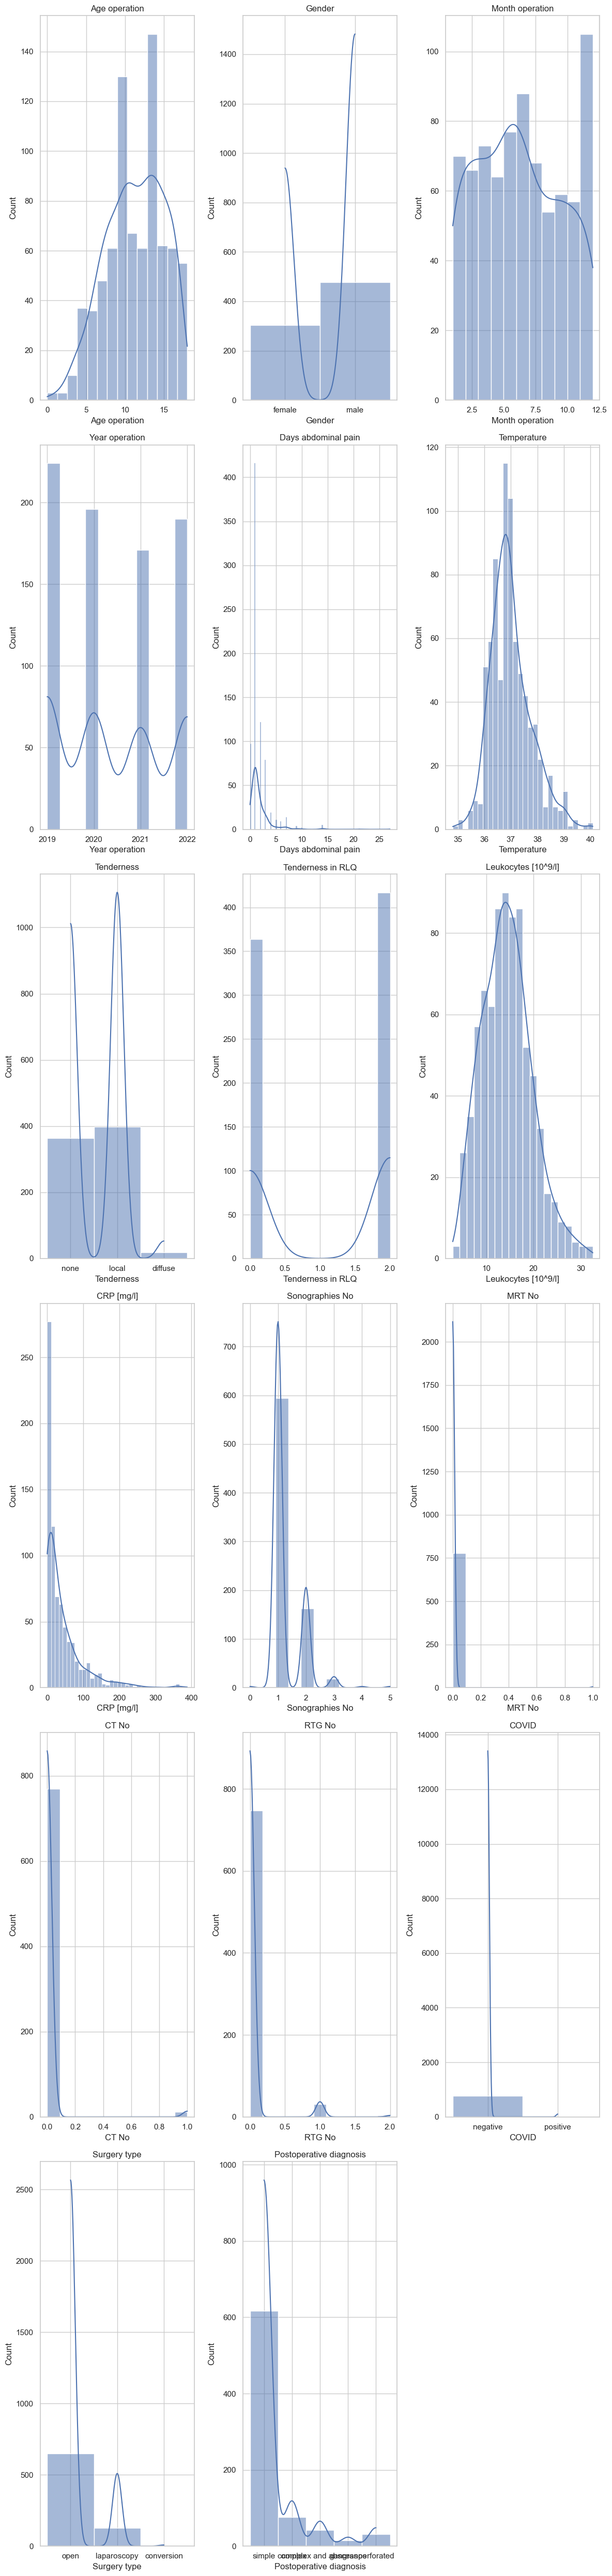

In [5]:
# Set up Seaborn for better styling
sn.set(style="whitegrid", font="Arial")

# Create a grid of histograms
plt.figure(figsize=(12, 50))  # Adjust the figure size as needed
num_columns = 3
num_rows = 6

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, num_columns, i+1)
    sn.histplot(df[column], kde=True)
    plt.title(column)
    plt.tight_layout()

plt.show()

In [6]:
df.head()

,Age operation,Gender,Month operation,Year operation,Days abdominal pain,Temperature,Tenderness,Tenderness in RLQ,Leukocytes [10^9/l],CRP [mg/l],Sonographies No,MRT No,CT No,RTG No,COVID,Surgery type,Postoperative diagnosis
0,15,female,1,2019,1,36.9,none,0,11.10,6.0,1.0,0,0,0.0,negative,open,simple
1,14,male,1,2019,2,37.0,none,0,21.28,30.8,1.0,0,0,0.0,negative,open,complex
2,16,male,1,2019,0,36.9,local,2,13.07,1.9,1.0,0,0,0.0,negative,open,simple
3,14,male,1,2019,1,35.7,local,2,7.95,0.0,2.0,0,0,0.0,negative,open,simple
4,16,female,1,2019,7,37.9,none,0,14.82,14.4,3.0,0,0,0.0,negative,open,simple


In [7]:
print(df.dtypes)

Age operation                int64
Gender                      object
Month operation              int64
Year operation               int64
Days abdominal pain          int64
Temperature                float64
Tenderness                  object
Tenderness in RLQ            int64
Leukocytes [10^9/l]        float64
CRP [mg/l]                 float64
Sonographies No            float64
MRT No                       int64
CT No                        int64
RTG No                     float64
COVID                       object
Surgery type                object
Postoperative diagnosis     object
dtype: object


In [8]:
for col_name in df.columns:
    if df[col_name].dtype == 'object':
        print(df[col_name].value_counts())

Gender
male      478
female    303
Name: count, dtype: int64
Tenderness
local      398
none       364
diffuse     19
Name: count, dtype: int64
COVID
negative    775
positive      6
Name: count, dtype: int64
Surgery type
open           650
laparoscopy    129
conversion       2
Name: count, dtype: int64
Postoperative diagnosis
simple                 617
complex                 76
complex and abscess     42
perforated              31
gangranos               15
Name: count, dtype: int64


In [9]:
encoding_values = {
    'Gender':
        {'male': 0, 'female': 1},
    'Tenderness':
        {'local': 0, 'none': 1, 'diffuse': 2},
    'COVID':
        {'negative': 0, 'positive': 1},
    'Surgery type':
        {'open': 0, 'laparoscopy': 1, 'conversion': 2},
    'Postoperative diagnosis':
        {'simple': 0, 'complex': 1, 'complex and abscess': 2, 'perforated': 3, 'gangranos': 4}
}

In [10]:
df = df.replace(encoding_values)
df.head()

,Age operation,Gender,Month operation,Year operation,Days abdominal pain,Temperature,Tenderness,Tenderness in RLQ,Leukocytes [10^9/l],CRP [mg/l],Sonographies No,MRT No,CT No,RTG No,COVID,Surgery type,Postoperative diagnosis
0,15,1,1,2019,1,36.9,1,0,11.10,6.0,1.0,0,0,0.0,0,0,0
1,14,0,1,2019,2,37.0,1,0,21.28,30.8,1.0,0,0,0.0,0,0,1
2,16,0,1,2019,0,36.9,0,2,13.07,1.9,1.0,0,0,0.0,0,0,0
3,14,0,1,2019,1,35.7,0,2,7.95,0.0,2.0,0,0,0.0,0,0,0
4,16,1,1,2019,7,37.9,1,0,14.82,14.4,3.0,0,0,0.0,0,0,0


In [11]:
df.dtypes

Age operation                int64
Gender                       int64
Month operation              int64
Year operation               int64
Days abdominal pain          int64
Temperature                float64
Tenderness                   int64
Tenderness in RLQ            int64
Leukocytes [10^9/l]        float64
CRP [mg/l]                 float64
Sonographies No            float64
MRT No                       int64
CT No                        int64
RTG No                     float64
COVID                        int64
Surgery type                 int64
Postoperative diagnosis      int64
dtype: object

In [12]:
df.to_csv('new_encoded.csv', index=False)

In [13]:
corr_matrix_pearson = df.corr(method='pearson')
corr_matrix_spearman = df.corr(method='spearman')

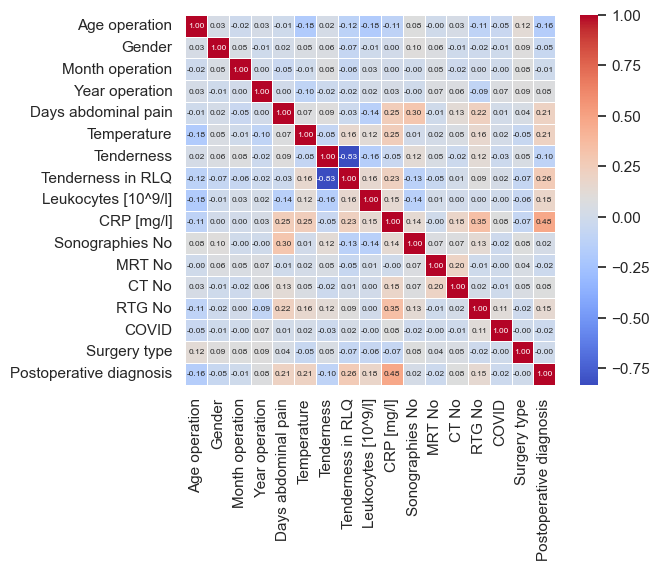

In [14]:
sn.heatmap(corr_matrix_pearson, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, annot_kws={"size": 6})
plt.show()

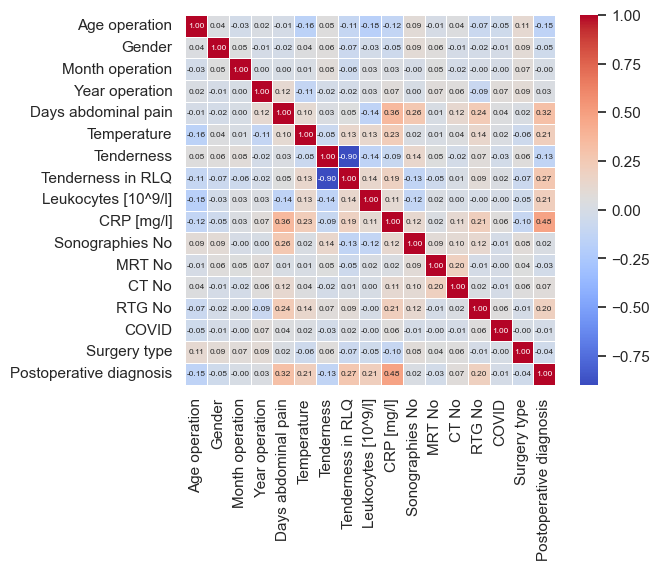

In [15]:
sn.heatmap(corr_matrix_spearman, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True, annot_kws={"size": 6})
plt.show()

In [16]:
df.describe()

,Age operation,Gender,Month operation,Year operation,Days abdominal pain,Temperature,Tenderness,Tenderness in RLQ,Leukocytes [10^9/l],CRP [mg/l],Sonographies No,MRT No,CT No,RTG No,COVID,Surgery type,Postoperative diagnosis
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,11.248399,0.387964,6.152369,2020.418694,1.743918,37.003585,0.514725,1.067862,14.391306,42.235736,1.270166,0.002561,0.015365,0.047375,0.007682,0.170294,0.400768
std,3.712386,0.487599,3.337984,1.142471,2.138411,0.773064,0.546646,0.998334,5.220823,56.761878,0.543015,0.050572,0.123078,0.229959,0.087368,0.382889,0.904093
min,0.000000,0.000000,1.000000,2019.000000,0.000000,34.800000,0.000000,0.000000,2.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,3.000000,2019.000000,1.000000,36.500000,0.000000,0.000000,10.500000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,6.000000,2020.000000,1.000000,36.900000,0.000000,2.000000,14.100000,20.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.000000,1.000000,9.000000,2021.000000,2.000000,37.400000,1.000000,2.000000,17.520000,55.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,1.000000,12.000000,2022.000000,27.000000,40.100000,2.000000,2.000000,32.500000,388.200000,5.000000,1.000000,1.000000,2.000000,1.000000,2.000000,4.000000


In [17]:
# Each row, ignoring the last column
# X = df.iloc[:, :-1]
X = df.iloc[:, 2:-1]
X.to_csv('new_day_X.csv', index=False)

# Each row, using only the last column
y = df.iloc[:, -1]
y.to_csv('new_day_y.csv', index=False)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(585, 14)
(585,)
(196, 14)
(196,)


In [20]:
from sklearn.ensemble import RandomForestClassifier

regr = RandomForestClassifier(n_estimators=75)
regr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75)

In [21]:
y_test_hat = regr.predict(X_test)

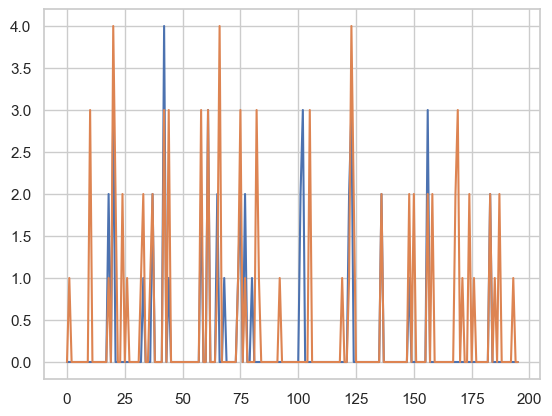

In [22]:
plt.plot(np.arange(0, len(y_test_hat)), y_test_hat)
plt.plot(np.arange(0, len(y_test_hat)), y_test)

In [23]:
1 - np.mean(y_test_hat != y_test)

0.7908163265306123

In [24]:
# Saving the model
import pickle
file = open('new_app_rf', 'wb')
pickle.dump(regr, file)
file.close()

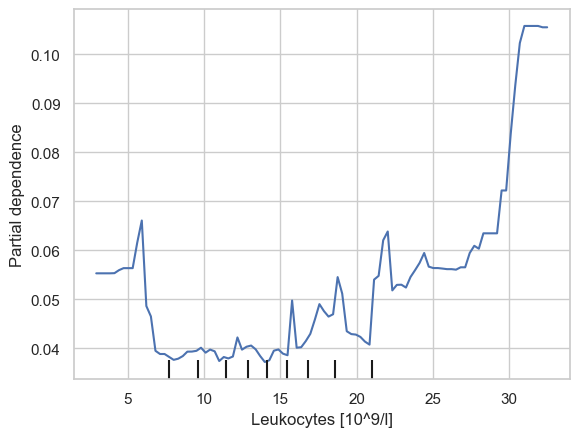

In [25]:
from sklearn.inspection import PartialDependenceDisplay

pdp_temp = PartialDependenceDisplay.from_estimator(regr, X, [6], percentiles=(0, 1), method='auto', target=3)

In [26]:
from scipy.stats import shapiro

In [27]:
for i in range(len(df.columns)):
    stat, p = shapiro(df.iloc[:, i])
    maybe = 'not ' if p <= 0.05 else ''
    print(f'{df.columns[i]} - stat={stat:.2f}, p={p:.2f} - probably {maybe} normal')
    

stat, p = shapiro(np.random.normal(size=100))
maybe = 'not ' if p <= 0.05 else ''
print(f'CHECK - stat={stat:.2f}, p={p:.2f} - probably {maybe} normal')

Age operation - stat=0.97, p=0.00 - probably not  normal
Gender - stat=0.62, p=0.00 - probably not  normal
Month operation - stat=0.95, p=0.00 - probably not  normal
Year operation - stat=0.85, p=0.00 - probably not  normal
Days abdominal pain - stat=0.55, p=0.00 - probably not  normal
Temperature - stat=0.96, p=0.00 - probably not  normal
Tenderness - stat=0.70, p=0.00 - probably not  normal
Tenderness in RLQ - stat=0.63, p=0.00 - probably not  normal
Leukocytes [10^9/l] - stat=0.98, p=0.00 - probably not  normal
CRP [mg/l] - stat=0.71, p=0.00 - probably not  normal
Sonographies No - stat=0.55, p=0.00 - probably not  normal
MRT No - stat=0.03, p=0.00 - probably not  normal
CT No - stat=0.10, p=0.00 - probably not  normal
RTG No - stat=0.20, p=0.00 - probably not  normal
COVID - stat=0.06, p=0.00 - probably not  normal
Surgery type - stat=0.46, p=0.00 - probably not  normal
Postoperative diagnosis - stat=0.51, p=0.00 - probably not  normal
CHECK - stat=0.99, p=0.67 - probably  normal
